<a href="https://colab.research.google.com/github/filo-limantara/test/blob/main/monotonicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install adabelief-tf
#!pip install tensorflow-addons

In [2]:
import tensorflow as tf
#import tensorflow_addons as tfa
print("TensorFlow version:", tf.__version__)
#from adabelief_tf import AdaBeliefOptimizer
import numpy as np
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

TensorFlow version: 2.15.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9775126149447042827
xla_global_id: -1
]


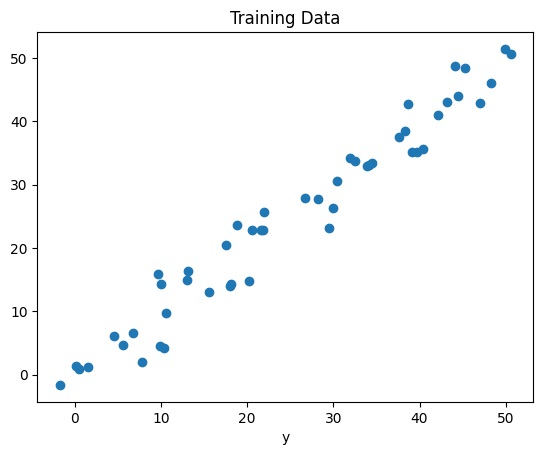

[<tf.Variable 'W:0' shape=(1, 1) dtype=float32, numpy=array([[0.69456464]], dtype=float32)>, <tf.Variable 'W2:0' shape=(1, 1) dtype=float32, numpy=array([[0.34245676]], dtype=float32)>, <tf.Variable 'W4:0' shape=(1, 1) dtype=float32, numpy=array([[0.23979096]], dtype=float32)>, <tf.Variable 'W5:0' shape=(1, 1) dtype=float32, numpy=array([[0.96883595]], dtype=float32)>, <tf.Variable 'W6:0' shape=(1, 1) dtype=float32, numpy=array([[0.288557]], dtype=float32)>, <tf.Variable 'W7:0' shape=(1, 1) dtype=float32, numpy=array([[0.14731161]], dtype=float32)>, <tf.Variable 'b:0' shape=(1, 1) dtype=float32, numpy=array([[0.6088573]], dtype=float32)>]
Epoch 50 : cost = 23.576591
Epoch 100 : cost = 5.462178
Epoch 150 : cost = 2.7616336
Epoch 200 : cost = 2.4921448
Epoch 250 : cost = 2.445194
Epoch 300 : cost = 2.41926
Epoch 350 : cost = 2.399274
Epoch 400 : cost = 2.3815484
Epoch 450 : cost = 2.3650074
Epoch 500 : cost = 2.3493273
Epoch 550 : cost = 2.3349612
Epoch 600 : cost = 2.3214002
Epoch 650 :

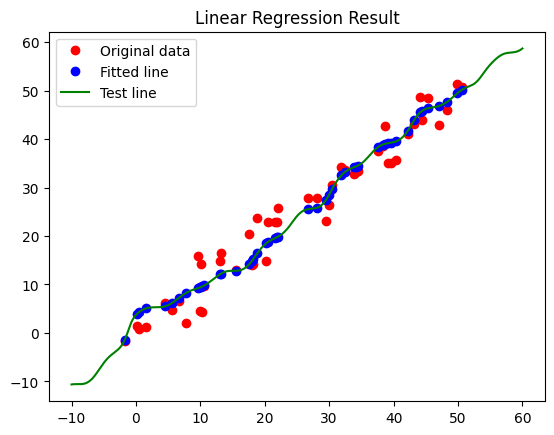

In [3]:
import numpy as np
import tensorflow as tf
#tf.enable_v2_behavior()
import matplotlib.pyplot as plt

np.random.seed(101)
tf.random.set_seed(101)

x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)
x_test = np.linspace(-10, 60, 1000)

# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

n = len(x) # Number of data points
x = x.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y = y.reshape(-1,1)

plt.scatter(x, y)
plt.xlabel('x')
plt.xlabel('y')
plt.title("Training Data")
plt.show()

x_test = tf.constant(x_test, dtype=tf.float32)
x_o = x = tf.constant(x, dtype=tf.float32)
y_o = y = tf.constant(y, dtype=tf.float32)

W = tf.Variable([[np.random.random_sample()]], name = "W")
W2 = tf.Variable([[np.random.random_sample()]], name = "W2")
W3 = tf.Variable([[np.random.random_sample()]], name = "W3")
W4 = tf.Variable([[np.random.random_sample()]], name = "W4")
W5 = tf.Variable([[np.random.random_sample()]], name = "W5")
W6 = tf.Variable([[np.random.random_sample()]], name = "W6")
W7 = tf.Variable([[np.random.random_sample()]], name = "W7")
W8 = tf.Variable([[np.random.random_sample()]], name = "W8")
W9 = tf.Variable(np.random.random([8,8]), name = "W9")
b9 = tf.Variable(np.random.random([8,8]), name = "b9")
b = tf.Variable([[np.random.randn()]], name = "b")

learning_rate = 0.01
training_epochs = 500 #1000

def y_pred(x):
    recursive = 10;
    y_pred = x;
    prev_pred = np.zeros([x.shape[0],1]);
    treshold = recursive;
    buffer = np.zeros([x.shape[0],7]);
    for i in range(0, recursive):
        #weight_alters = tf.matmul(buffer,W8.numpy());
        #print(weight_alters.shape);
        n1 = prev_pred; #(prev_pred*W7);
        #n2 = x; #x*W8;
        n3 = tf.nn.tanh(tf.multiply(y_pred, W));
        n4 = tf.multiply(y_pred, W2);
        n5 = tf.nn.sigmoid(tf.multiply(y_pred, W3));
        n6 = tf.math.atan(tf.multiply(y_pred, W4));
        n7 = tf.math.sin(tf.multiply(y_pred, W5));
        n8 = tf.math.cos(tf.multiply(y_pred, W6));
        y_pred = n1+(n3+n4+n5+n6+n7+n8+b)*(W7**(recursive+1));
        cache = tf.concat([
            n1,
            #tf.reshape(n2, [-1,1]),
            tf.reshape(n3, [-1,1]),
            tf.reshape(n4, [-1,1]),
            tf.reshape(n5, [-1,1]),
            tf.reshape(n6, [-1,1]),
            tf.reshape(n7, [-1,1]),
            tf.reshape(n8, [-1,1])
        ], axis=1);
        buffer = cache;
        prev_pred = y_pred;
    return y_pred;

# Mean Squared Error Cost Function
def cost():
    h = tf.keras.losses.Huber()
    #cost = tf.reduce_sum(tf.pow(y_pred(x)-y, 2)) / (2 * n)
    cost = h(y, y_pred(x))
    return cost
# Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate, amsgrad=False)
#optimizer = tf.keras.optimizers.Adam(learning_rate, amsgrad=True)
#optimizer = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False)
#optimizer = tf.keras.optimizers.Adamax(learning_rate)
#optimizer = tf.keras.optimizers.SGD(learning_rate)

pred = y_pred(x) #run to initialize weight and bias
#trainable_vars = [W, W2, W3, b]
#trainable_vars = [W, W2, W4, W5, W6, W7, W8, b]
trainable_vars = [W, W2, W4, W5, W6, W7, b]
print(trainable_vars)
for epoch in range(training_epochs):
    optimizer.minimize(cost, trainable_vars)
    pred=y_pred(x)
    if (epoch + 1) % 50 == 0:
        c = cost()
        #print("Epoch", (epoch + 1), ": cost =", c.numpy(), "W =", W.numpy(), "b =", b.numpy())
        print("Epoch", (epoch + 1), ": cost =", c.numpy())
print(trainable_vars)

pred = y_pred(x_o)
plt.plot(x_o, y_o, 'ro', label ='Original data')
plt.plot(x_o, pred,'bo', label ='Fitted line')
plt.plot(x_test, y_pred(x_test),'g', label ='Test line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "x":np.array([i/1000.0 for i in range(0,1000)])*2.0-1.0,
    "y":np.array([i/1000.0 for i in range(0,1000)])*2.0-1.0
})

<Axes: xlabel='x'>

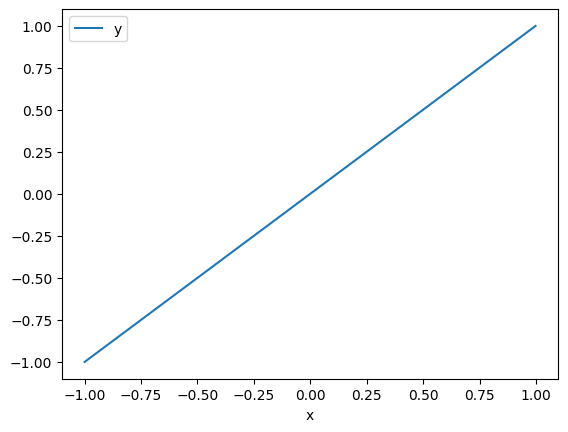

In [5]:
df.plot.line("x","y")

In [6]:
def sigmoid(x):
    # return np.where(
    #         x >= 0, # condition
    #         1 / (1 + np.exp(-x)), # For positive values
    #         np.exp(x) / (1 + np.exp(x)) # For negative values
    # )
    return np.tanh(x * 0.5) * 0.5 + 0.5

<Axes: >

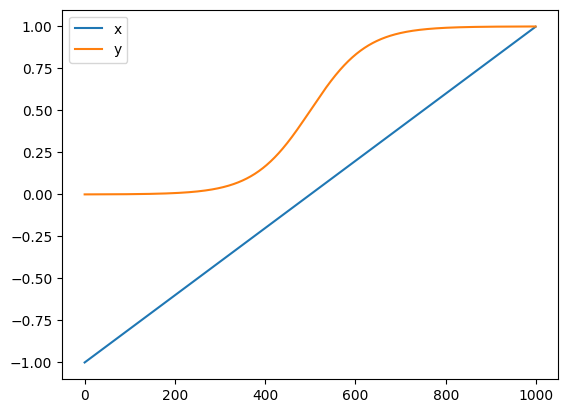

In [7]:
df1 = df.copy();
df1['y'] = sigmoid((df1['x'])*8.0);
df1.plot()

In [8]:
def soft_step(x): return np.tanh(x * 0.5) * 0.5 + 0.5
def sigmoid(x):
    return np.where(
            x >= 0, # condition
            1 / (1 + np.exp(-x)), # For positive values
            np.exp(x) / (1 + np.exp(x)) # For negative values
    )

def custom_monotonic_layer(x, params={}):
  x = x.values.reshape((-1,1))
  #print("1.", x.shape);
  #print("2.", params['w'].shape);
  #print("3.", params['b'].shape);
  # enforce weight and scale to be (+)
  v = (soft_step(x * (params['w']**2) + params['b']) * params['s']**2)
  #print("4.", v.shape);
  _sum = (sigmoid(np.sum(v,axis=1))-0.5)*2.0;
  v = _sum.reshape(-1,1);

  if(params['inv']>=0.5): v = 1.0-v;

  #print("5.", v.shape);
  return v;

(-0.05, 1.05)

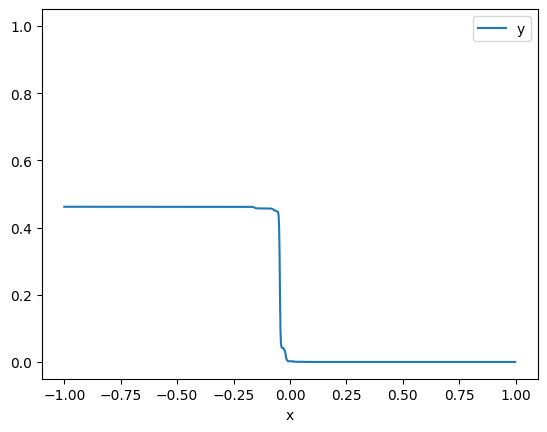

In [9]:
df2 = df.copy();
inv = np.random.random();

df2['y'] = custom_monotonic_layer(df1['x'],
  params = {
    "w" : (np.random.randn(20,1)*32.0).reshape(1,-1), #weight / curve slant
    "s" : (np.random.randn(20,1)).reshape(1,-1), #scale
    "b" : (np.random.randn(20,1)*40.0-20.0).reshape(1,-1), #cutoff
    "inv": inv
  }
);
df2 = df2.set_index("x")
ax1 = df2.plot()
ax1.set_ylim(-0.05,1.05)

(-0.05, 1.05)

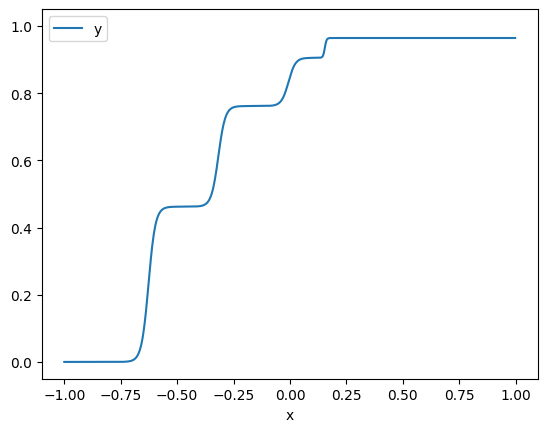

In [10]:
df3 = df.copy();
inv = np.random.random();

df3['y'] = custom_monotonic_layer(df3['x'],
  params = {
    "w" : np.array([8.0,  8.0,  8.0, 16.0,   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), #weight / curve slant
    "s" : np.array([1,    1,    1,   1,     0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), #scale
    "b" : np.array([40.0, 20.0, 0.0, -40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), #cutoff
    "inv": inv
  }
);
df3 = df3.set_index("x")
ax1 = df3.plot()
ax1.set_ylim(-0.05,1.05)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay

rng = np.random.RandomState(0)

n_samples = 1000
f_0 = rng.rand(n_samples)
f_1 = rng.rand(n_samples)
X = np.c_[f_0, f_1]
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)

# y is positively correlated with f_0, and negatively correlated with f_1
y = 5 * f_0 + np.sin(10 * np.pi * f_0) - 5 * f_1 - np.cos(10 * np.pi * f_1) + noise

<Figure size 1800x600 with 0 Axes>

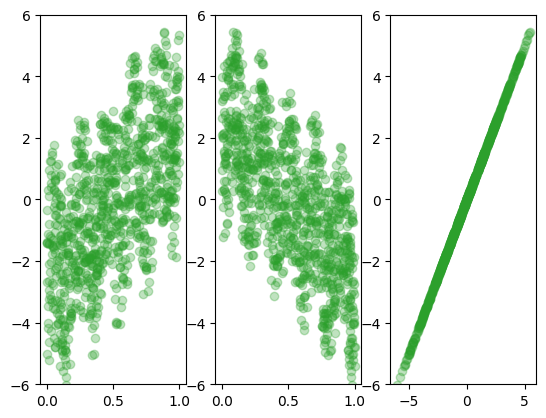

In [12]:
plt.figure(figsize=(18,6))
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(
    X[:, 0], y, "o", alpha=0.3, zorder=-1, color="tab:green"
)
ax1.set_ylim(-6, 6)
ax2.plot(
    X[:, 1], y, "o", alpha=0.3, zorder=-1, color="tab:green"
)
ax2.set_ylim(-6, 6)
ax3.plot(
    y, y, "o", alpha=0.3, zorder=-1, color="tab:green"
)
ax3.set_ylim(-6, 6)
plt.show()

In [13]:
gbdt_no_cst = HistGradientBoostingRegressor()
gbdt_no_cst.fit(X, y)

HistGradientBoostingRegressor()

In [14]:
gbdt_with_monotonic_cst = HistGradientBoostingRegressor(monotonic_cst=[1, -1])
gbdt_with_monotonic_cst.fit(X, y)
gbdt_with_monotonic_cst.score(X, y)

0.906857016824181

<Figure size 1200x600 with 0 Axes>

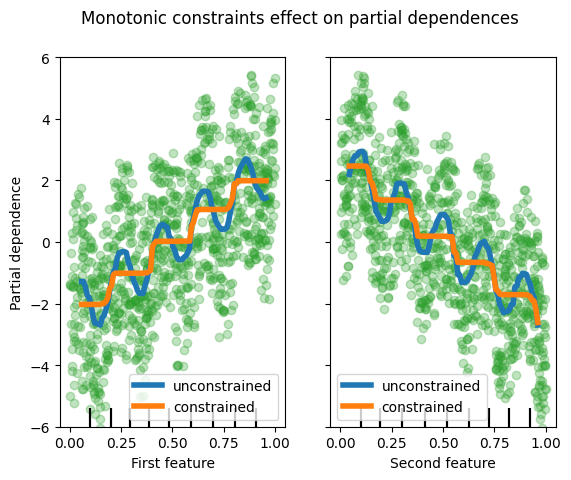

In [15]:
plt.figure(figsize=(12,6))

fig, ax = plt.subplots()
disp = PartialDependenceDisplay.from_estimator(
    gbdt_no_cst,
    X,
    features=[0, 1],
    feature_names=(
        "First feature",
        "Second feature",
    ),
    line_kw={"linewidth": 4, "label": "unconstrained", "color": "tab:blue"},
    ax=ax,
)
disp = PartialDependenceDisplay.from_estimator(
    gbdt_with_monotonic_cst,
    X,
    features=[0, 1],
    line_kw={"linewidth": 4, "label": "constrained", "color": "tab:orange"},
    ax=disp.axes_,
)

for f_idx in (0, 1):
    disp.axes_[0, f_idx].plot(
        X[:, f_idx], y, "o", alpha=0.3, zorder=-1, color="tab:green"
    )
    disp.axes_[0, f_idx].set_ylim(-6, 6)

plt.legend()
fig.suptitle("Monotonic constraints effect on partial dependences")
plt.show()

In [18]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import LabelBinarizer

class ClassifierTemplate(BaseEstimator, ClassifierMixin):
    def __init__(self, param={}):
        self.param = {};
        self._mlb = LabelBinarizer();

    def fit(self, X, y):
        # X must be pandas DataFrame
        # y must be text based label

        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        #label binarizer
        self._mlb.fit(y);

        # Store the classes seen during fit
        self.classes_ = self._mlb.classes_

        #transform y
        _y = self._mlb.transform(y);

        #main fit function
        self._fit(X, _y);

        # Return the classifier
        return self;

    def predict_proba(self, X):
        # Check if fit has been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        return self._predict_proba(X);

    def predict_array(self, X):
        import numpy as np
        # Check if fit has been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        #predict proba
        #return vector with the highest value as 1 and else as 0
        #if all values are the same then only the first to be marked as 1 else will be zero
        argmaxs = np.argmax(self._predict_proba(X),axis=1);
        ret = np.zeros([X.shape[0],len(self.classes_)]);
        for i in range(0, argmaxs.shape[0]): ret[i,argmaxs[i]] = 1.0;
        return ret;

    def predict(self, X):
        # Check if fit has been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        #return predicted class
        return self._mlb.inverse_transform(self.predict_array(X));

In [20]:
class MonoNonLinClassifier(ClassifierTemplate): # Monotonic NonLinear Classifier
    def _fit(self, X, y): #y should be ready in one hot encoding format, classes_ should have values
        from sklearn.linear_model import LogisticRegression
        self.logreg = LogisticRegression(fit_intercept=True, solver='newton-cg')
        self.logreg.fit(X, self._mlb.inverse_transform(y));

    def _predict_proba(self, X):
        return self.logreg.predict_proba(X);

In [ ]:
print("this is newer 2")